<a href="https://colab.research.google.com/github/AayushiPatel123/Deep_Learning/blob/main/ML_Assignmnet_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
circles_dataset = pd.read_csv('circles0.3.csv')
# circles_dataset = pd.read_csv('halfkernel.csv')
#circles_dataset = pd.read_csv('moons1.csv')
#circles_dataset = pd.read_csv('spiral1.csv')
#circles_dataset = pd.read_csv('twogaussians33.csv')
#circles_dataset = pd.read_csv('twogaussians42.csv')
X_circles = circles_dataset.iloc[:,:-1].values
Y_circles = circles_dataset.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_circles_train,X_circles_test,Y_circles_train,Y_circles_test = train_test_split(X_circles,Y_circles, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_circles_train = sc.fit_transform(X_circles_train)
X_circles_test = sc.transform(X_circles_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
circles_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
circles_classifier.fit(X_circles_train,Y_circles_train)

KNeighborsClassifier()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=2)
regressor.fit(X_circles_train, Y_circles_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
y_pred = regressor.predict(X_circles_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(Y_circles_test, y_pred)
mse = mean_squared_error(Y_circles_test, y_pred)
rmse = mean_squared_error(Y_circles_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.0
mse: 0.0
rmse: 0.0


In [ ]:
regressor.score(X_circles_test, Y_circles_test)

1.0

In [ ]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_circles_train, Y_circles_train)
    pred_i = knn.predict(X_circles_test)
    mae = mean_absolute_error(Y_circles_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

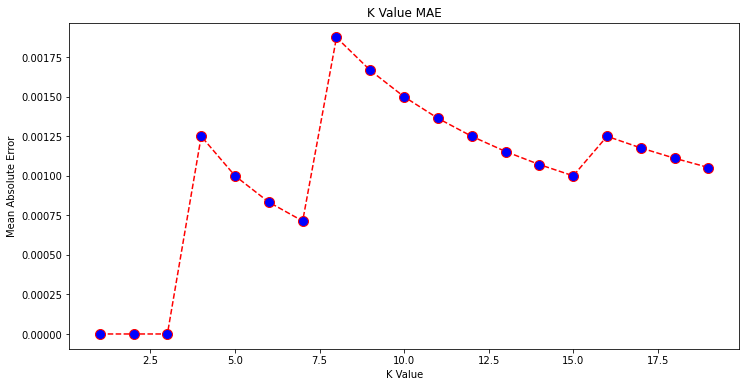

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'Mean Absolute Error')

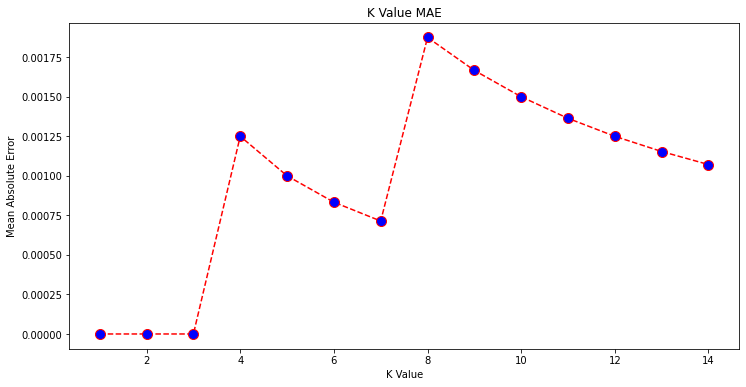

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error[:14], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [ ]:
print(circles_classifier.predict([[-0.417892932696127,-0.0643407747455199]]))
Y_circles_pred = circles_classifier.predict(X_circles_test)
print(Y_circles_pred)
#print(np.concatenate((Y_circles_pred.reshape(len(Y_circles_pred),1), Y_circles_test.reshape(len(Y_circles_test),1)), 1))

[1]
[0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0
 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0
 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
circles_cm = confusion_matrix(Y_circles_test,Y_circles_pred)
print(circles_cm)

[[ 97   0]
 [  0 103]]


In [ ]:
circles_ac = (accuracy_score(Y_circles_test,Y_circles_pred)*100)
print(circles_ac)

100.0


In [ ]:
###Applying 10-Fold Cross Validation


In [ ]:
from sklearn.model_selection import cross_val_score
circles_accuracies = cross_val_score( estimator = circles_classifier, X =X_circles_train, y=Y_circles_train, cv=10)
print("Accuracy of model for Dataset at K=5 is: {:.2f} %".format(circles_accuracies.mean()*100))

Accuracy of model for Dataset at K=5 is: 100.00 %


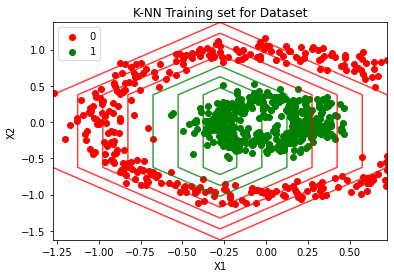

In [ ]:
from matplotlib.colors import ListedColormap
X_set,Y_set = sc.inverse_transform(X_circles_train), Y_circles_train
X1, X2 =  np.meshgrid(np.arange(start = X_set[:,0].min() - 0.01, stop = X_set[:, 0].max() + 0.01, step = 1),
                      np.arange(start = X_set[:,1].min() - 0.5, stop = X_set[:, 1].max() + 0.5, step = 1))
plt.contour(X1, X2, circles_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), 
            alpha =0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j,1], c= ListedColormap(('red', 'green'))(i), label = j )
plt.title('K-NN Training set for Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

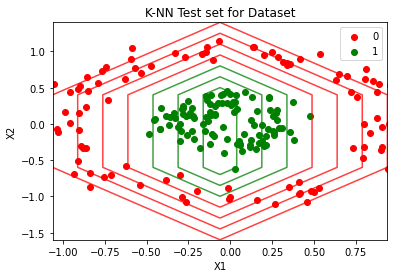

In [ ]:
from matplotlib.colors import ListedColormap
X_set,Y_set = sc.inverse_transform(X_circles_test), Y_circles_test
X1, X2 =  np.meshgrid(np.arange(start = X_set[:,0].min() - 0.01, stop = X_set[:, 0].max() + 0.01, step = 1),
                      np.arange(start = X_set[:,1].min() - 0.5, stop = X_set[:, 1].max() + 0.5, step = 1))
#plt.figure(figsize=(20,10))
plt.contour(X1, X2, circles_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), 
            alpha =0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j,1], c= ListedColormap(('red', 'green'))(i), label = j )
plt.title('K-NN Test set for Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [ ]:
import sklearn.metrics
import math
def matrix_metrix(Y_circles_test,Y_circles_pred,beta):
   CM = confusion_matrix(Y_circles_test,Y_circles_pred)
   TN = CM[0][0]
   FN = CM[1][0] 
   TP = CM[1][1]
   FP = CM[0][1]
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population*100,2)
   Accuracy   = round( (TP+TN) / Population*100,4)
   PPV  = round(( TP / (TP+FP))*100,4 )
   NPV        = round( TN / (TN+FN)*100,4 )  
   mat_met = pd.DataFrame({
'Metric':['TP','TN','FP','FN','Prevalence','Accuracy','PPV','NPV'],     'Value':[TP,TN,FP,FN,Prevalence,Accuracy,PPV,NPV]})
   return (mat_met)

In [ ]:
beta = 0.4
mat_met = matrix_metrix(Y_circles_test,Y_circles_pred,beta)
#convert float into integer
def round_int(x):
    if x in [float("-inf"),float("inf")]: return float("nan")
    return int(round(x))
print (mat_met)

       Metric  Value
0          TP  103.0
1          TN   97.0
2          FP    0.0
3          FN    0.0
4  Prevalence   51.5
5    Accuracy  100.0
6         PPV  100.0
7         NPV  100.0


Classification using quadratic discriminant analysis

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
model = QuadraticDiscriminantAnalysis()
model.fit(X_circles_train,Y_circles_train)

QuadraticDiscriminantAnalysis()

In [ ]:
print(model.predict([[-0.417892932696127,-0.0643407747455199]]))

[1]


In [ ]:
Y_model_pred = model.predict(X_circles_test)
#print(np.concatenate((Y_circles_pred.reshape(len(Y_circles_pred),1), Y_circles_test.reshape(len(Y_circles_test),1)), 1))

In [ ]:
model_cm = confusion_matrix(Y_circles_test,Y_model_pred)
print(model_cm)

[[ 97   0]
 [  1 102]]


In [ ]:
circles_accuracies = cross_val_score( estimator = model, X =X_circles_train, y=Y_circles_train, cv=10)
print("Accuracy for Dataset for QDA: {:.2f} %".format(circles_accuracies.mean()*100))

Accuracy for Dataset for QDA: 99.12 %


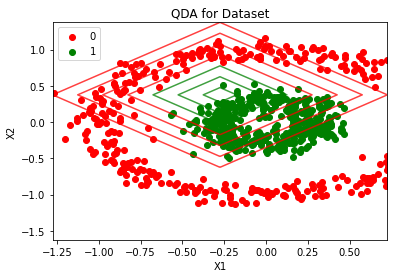

In [ ]:
X_set,Y_set = sc.inverse_transform(X_circles_train), Y_circles_train
X1, X2 =  np.meshgrid(np.arange(start = X_set[:,0].min() - 0.01, stop = X_set[:, 0].max() + 0.01, step = 1),
                      np.arange(start = X_set[:,1].min() - 0.5, stop = X_set[:, 1].max() + 0.5, step = 1))
plt.contour(X1, X2, model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), 
            alpha= 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j,1], c= ListedColormap(('red', 'green'))(i), label = j )
plt.title('QDA for Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [ ]:
def matrix_metrix(Y_circles_test,Y_model_pred,beta):
   CM = confusion_matrix(Y_circles_test,Y_model_pred)
   TN = CM[0][0]
   FN = CM[1][0] 
   TP = CM[1][1]
   FP = CM[0][1]
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population*100,2)
   Accuracy   = round( (TP+TN) / Population*100,4)
   PPV  = round(( TP / (TP+FP))*100,4 )
   NPV        = round( TN / (TN+FN)*100,4 )  
   mat_met = pd.DataFrame({
'Metric':['TP','TN','FP','FN','Prevalence','Accuracy','PPV','NPV'],     'Value':[TP,TN,FP,FN,Prevalence,Accuracy,PPV,NPV]})
   return (mat_met)

In [ ]:
beta = 0.4
mat_met = matrix_metrix(Y_circles_test,Y_model_pred,beta)
#convert float into integer
def round_int(x):
    if x in [float("-inf"),float("inf")]: return float("nan")
    return int(round(x))
print (mat_met)

       Metric     Value
0          TP  102.0000
1          TN   97.0000
2          FP    0.0000
3          FN    1.0000
4  Prevalence   51.0000
5    Accuracy   99.5000
6         PPV  100.0000
7         NPV   98.9796


Classification using Linear discriminant analysis


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define model
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_circles_train,Y_circles_train)

LinearDiscriminantAnalysis()

In [ ]:
print(model_lda.predict([[-0.417892932696127,-0.0643407747455199]]))

[0]


In [ ]:
circles_accuracies = cross_val_score( estimator = model_lda, X =X_circles_train, y=Y_circles_train, cv=10)
print("Accuracy for Dataset for LDA: {:.2f} %".format(circles_accuracies.mean()*100))

Accuracy for Dataset for LDA: 40.62 %


Analysis using Naive bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
#instantiate the model
gnb = GaussianNB()
#fit the model
gnb.fit(X_circles_train,Y_circles_train)

GaussianNB()

In [ ]:
print(gnb.predict([[-0.417892932696127,-0.0643407747455199]]))

[1]


In [ ]:
circles_accuracies = cross_val_score( estimator = gnb, X =X_circles_train, y=Y_circles_train, cv=10)
print("Accuracy for Dataset for Naive bayes: {:.2f} %".format(circles_accuracies.mean()*100))

Accuracy for Dataset for Naive bayes: 99.00 %
